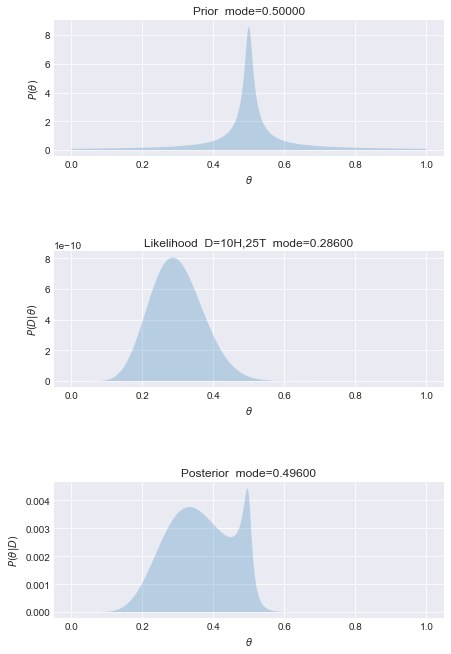

In [94]:
"""
Bayesian updating of beliefs about the bias of a coin. The prior and posterior
distributions indicate probability masses at discrete candidate values of theta.
"""
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')

# theta is the vector of candidate values for the parameter theta.
# n_theta_vals is the number of candidate theta values.
# To produce the examples in the book, set n_theta_vals to either 3 or 63.
n_theta_vals = 1001
# Now make the vector of theta values:
theta = np.linspace(0, 1, n_theta_vals)

# p_theta is the vector of prior probabilities on the theta values.
#p_theta = np.minimum(theta, 1-theta)  # Makes a triangular belief distribution.
#p_theta = p_theta / np.sum(p_theta)     # Makes sure that beliefs sum to 1.
#p_theta = sps.norm.pdf(theta, 0.5, .075)
p_theta = sps.t.pdf(theta, 0.25, 0.5, .025)

# Specify the data. To produce the examples in the book, use either
# data = np.repeat([1,0], [3, 9]) or data = np.repeat([1,0], [1, 11])
data = np.repeat([1, 0], [10, 25])
n_heads = np.sum(data)
n_tails = len(data) - n_heads

# Compute the likelihood of the data for each value of theta:
p_data_given_theta = theta**n_heads * (1-theta)**n_tails

# Compute the posterior:
p_data = np.sum(p_data_given_theta * p_theta)
p_theta_given_data = p_data_given_theta * p_theta / p_data   # This is Bayes' rule!

# Plot the results.
plt.figure(figsize=(7, 11))
plt.subplots_adjust(hspace=0.7)

# Plot the prior:
plt.subplot(3, 1, 1)
#plt.stem(theta, p_theta, markerfmt=' ', use_line_collection=True)
plt.fill_between(theta, 0, p_theta, alpha=.25)
plt.xlim(-.05, 1.05)
plt.xlabel('$\\theta$')
plt.ylabel('$P(\\theta)$')
plt.title(f'Prior  mode={theta[p_theta.argmax()]:.5f}')
# Plot the likelihood:
plt.subplot(3, 1, 2)
#plt.stem(theta, p_data_given_theta, markerfmt=' ', use_line_collection=True)
plt.fill_between(theta, 0, p_data_given_theta, alpha=.25)
plt.xlim(-.05, 1.05)
plt.xlabel('$\\theta$')
plt.ylabel('$P(D|\\theta)$')
plt.title(f'Likelihood  D={n_heads}H,{n_tails}T  mode={theta[p_data_given_theta.argmax()]:.5f}')
# Plot the posterior:
plt.subplot(3, 1, 3)
#plt.stem(theta, p_theta_given_data, markerfmt=' ', use_line_collection=True)
plt.fill_between(theta, 0, p_theta_given_data, alpha=.25)
plt.xlim(-.05, 1.05)
plt.xlabel('$\\theta$')
plt.ylabel('$P(\\theta|D)$')
plt.title(f'Posterior  mode={theta[p_theta_given_data.argmax()]:.5f}')

plt.show();